# Part A. Review Picture

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
img = cv2.imread("balls.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

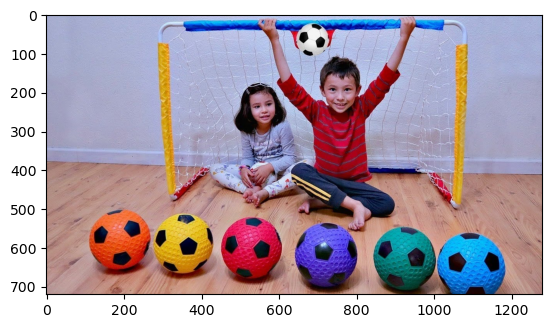

In [6]:
plt.imshow(img)
plt.show()

In above picture, we can find 6 balls with different color. Our target of this project is to locate some of balls using template matching of opencv

## A1. Review target image

You can crop the target image by yourself. In this project, I only provide you two target images named as target1.jpg and target2.jpg

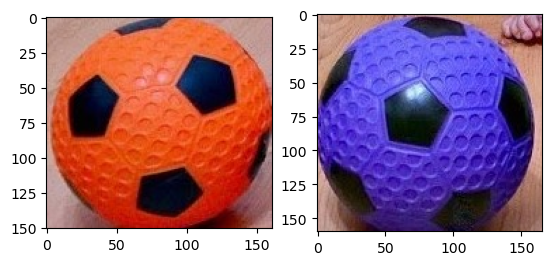

In [11]:
target1 = cv2.imread("target1.jpg")
target1 = cv2.cvtColor(target1, cv2.COLOR_BGR2RGB)

target2 = cv2.imread("target2.jpg")
target2 = cv2.cvtColor(target2, cv2.COLOR_BGR2RGB)
plt.subplot(1,2,1)
plt.imshow(target1)
plt.subplot(1,2,2)
plt.imshow(target2)
plt.show()

# Part B. Template Maching

## B1. Template Methods

In [12]:
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR','cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

### Create a copy of image because we don't want to modified the original image

In [16]:
full_copy = img.copy()

### Please select one of method using eval(). i.e. eval('cv2.TM_CCOEFF')

In [17]:
method = eval('cv2.TM_CCOEFF')
res = cv2.matchTemplate(full_copy,target1,method)

### Validate Output Shape

Theory:
W-w+1, H-h+1

In [25]:
print("X match? %s"%(res.shape[0] == img.shape[0] - target1.shape[0]+1))
print("Y match? %s"%(res.shape[1] == img.shape[1] - target1.shape[1]+1))

X match? True
Y match? True


In [29]:
height, width,channels = target1.shape

In [30]:
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

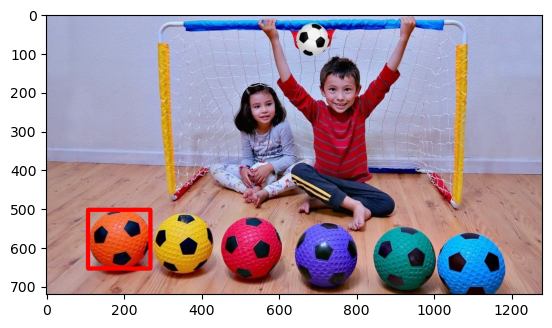

In [34]:
# Assign the Bottom Right of the rectangle
top_left = max_loc
bottom_right = (top_left[0] + width, top_left[1] + height)

# Draw the Red Rectangle
cv2.rectangle(full_copy,top_left, bottom_right, 255, 10)
plt.imshow(full_copy)
plt.show()

# PartC. All in one Code

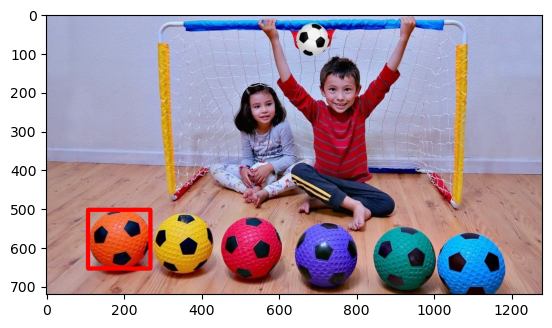

In [35]:
full_copy = img.copy()

method = eval('cv2.TM_CCOEFF')
res = cv2.matchTemplate(full_copy,target1,method)

height, width,channels = target1.shape
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

# Assign the Bottom Right of the rectangle
top_left = max_loc
bottom_right = (top_left[0] + width, top_left[1] + height)

# Draw the Red Rectangle
cv2.rectangle(full_copy,top_left, bottom_right, 255, 10)
plt.imshow(full_copy)
plt.show()

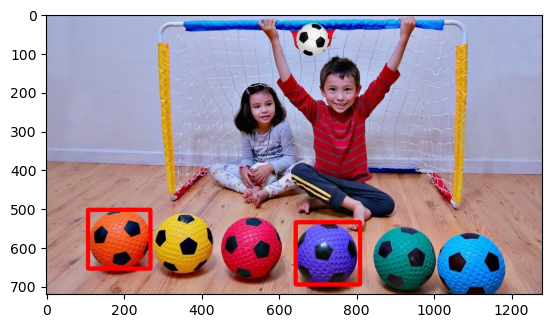

In [36]:
method = eval('cv2.TM_CCOEFF')
res = cv2.matchTemplate(full_copy,target2,method)

height, width,channels = target2.shape
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

# Assign the Bottom Right of the rectangle
top_left = max_loc
bottom_right = (top_left[0] + width, top_left[1] + height)

# Draw the Red Rectangle
cv2.rectangle(full_copy,top_left, bottom_right, 255, 10)
plt.imshow(full_copy)
plt.show()

# Challenge: Create detection without using library (Build with Maths)